In [1]:
import os, sys
from pathlib import Path
script_dir = Path(os.path.dirname(os.path.abspath('')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)

# import the rest of the modules
%matplotlib nbagg
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import arch
import pandas as pd
import tensorflow_probability as tfp
import time  
import sim
import compare

DTYPE = 'float32'

# define parameters for L63 system
dim = 4
sigma = 0.1

# define parameters for simlulation
n_particles = int(1e6)
n_subdivisions = 30
save_folder = '../data'
n_steps = 50
n_repeats = 10
dt = 0.1
r = 1.0

def mu_tf(X):
    x, y, x1, y1 = tf.split(X, dim, axis=-1)
    z = 4. * (x*x + y*y - 1.0)
    z1 = 4. * (x1*x1 + y1*y1 - 1.0)
    return tf.concat([-x*z, -y*z, -x1*z1, -y1*z1], axis=-1) 

mu_np = lambda X: mu_tf(X).numpy()

C:\Users\pinak\Documents\GitHub\sphere-fp


In [2]:
dim = 2
net = arch.LSTMForgetNet(50, 3, tf.float32, name="sphere{}D".format(dim))
net.load_weights('../data/2D-true-vs-learned/{}_100'.format(net.name)).expect_partial()
X = tf.random.uniform(shape=(10, dim))
net(*tf.split(X, dim, axis=-1))

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-0.05105925],
       [-0.19960621],
       [-0.00425161],
       [-0.10269707],
       [-0.12217547],
       [-0.00215796],
       [-0.09984571],
       [-0.24548176],
       [-0.06975263],
       [-0.02614198]], dtype=float32)>

In [3]:
from scipy.special import erf
import numpy as np

D = 1.0
def p_inf(x, y):
  Z = 0.5 * np.sqrt(np.pi**3 * D) * (1. + erf(1/np.sqrt(D)))
  return tf.exp(-(x**2 + y**2 - 1.)**2 / D) / Z

In [4]:
# compare.plot_difference_2D(steps=range(100, 50000, 100), truth=p_inf, domain=[[-2., -2.], [2., 2.]],\
#                            mc_domain=[[-3., -3.], [3., 3.]], net_path='../data/2D-true-vs-learned',\
#                            net_name='sphere2D', num_pts=1000, num_mc_pts=int(1e5), num_nodes=50, num_blocks=3, dtype=tf.float32,\
#                            name="sphere{}D".format(dim))




In [5]:
log = np.genfromtxt('../data/2D-true-vs-learned/train_log.csv', delimiter=',')

In [6]:
log

array([[0.00000000e+00, 1.36546660e+04, 3.54329181e+00],
       [1.00000000e+01, 1.66478760e+03, 3.83510876e+00],
       [2.00000000e+01, 3.19459560e+02, 4.09971809e+00],
       ...,
       [4.99700000e+04, 7.28141600e-03, 1.39389739e+03],
       [4.99800000e+04, 6.53919400e-03, 1.39421056e+03],
       [4.99900000e+04, 6.81814500e-03, 1.39447932e+03]])

<IPython.core.display.Javascript object>


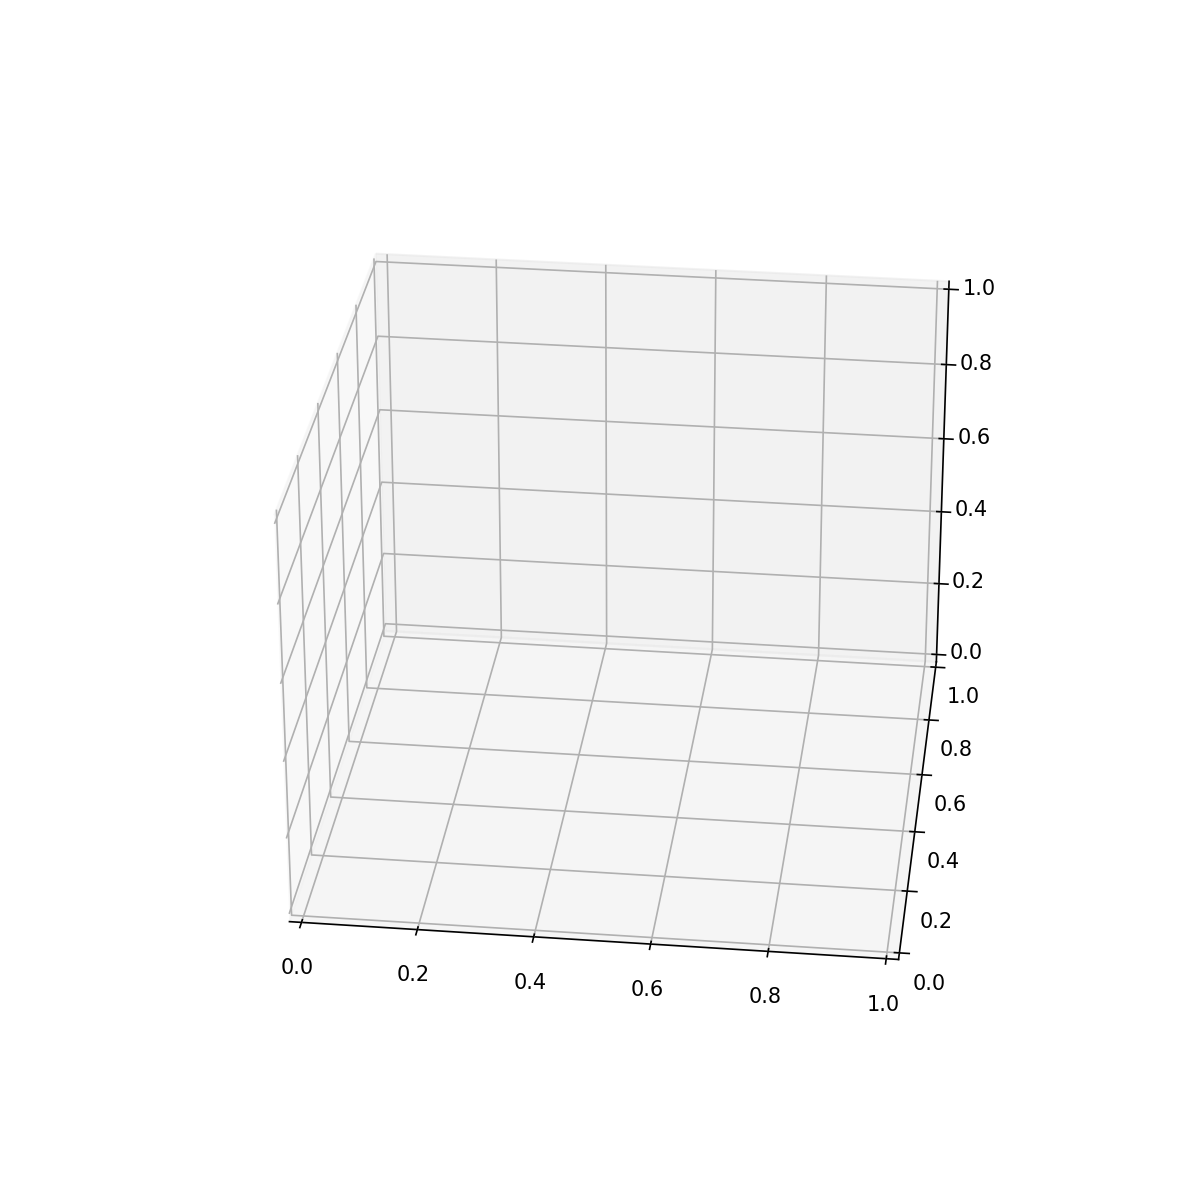

In [7]:
compare.plot_evolution(steps=range(100, 10000, 100), low=[-2., -2.], high=[2., 2.], resolution=30,\
                           truth=p_inf, mc_domain=[[-3., -3.], [3., 3.]], num_mc_pts=int(1e5),
                           fig_path='../data/2D-true-vs-learned/evolution', net_path='../data/2D-true-vs-learned',\
                           net_name='sphere2D', num_nodes=50, num_blocks=3, dtype=tf.float32,\
                           name="sphere{}D".format(dim))